In [36]:
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split, Bootstrap
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


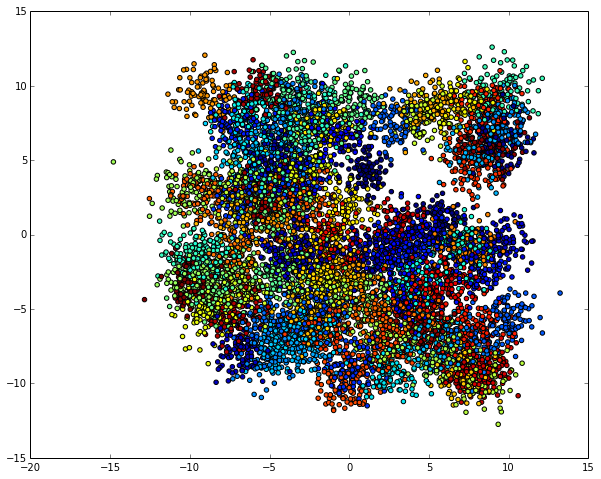

In [19]:
# Generate some random blobs

X, y = make_blobs(n_samples=10000, 
                  n_features=10, centers=100, random_state=0)

# Plot 'em, with color as a label
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y)

The main parameters to adjust when using these methods is **n_estimators** and **max_features**. 

- The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. 

- The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. 

Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks (where n_features is the number of features in the data).

### RTFM

- [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [27]:
## DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=None, 
                                min_samples_split=1, random_state=0)
scores = cross_val_score(dt_clf, X, y)
print "DecisionTreeClassifier", scores.mean()

## RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(rf_clf, X, y)
print "RandomForestClassifier", scores.mean()

## ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(extra_trees_clf, X, y)
print "ExtraTreesClassifier", scores.mean()

DecisionTreeClassifier 0.979408793821
RandomForestClassifier 0.999607843137
ExtraTreesClassifier 0.999898989899


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=123)

In [26]:
dt_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1, random_state=0).fit(x_train, y_train)
print metrics.confusion_matrix(dt_clf.predict(x_test), y_test)

[[31  0  2 ...,  0  0  0]
 [ 0 40  0 ...,  0  0  0]
 [ 0  0 36 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 40  0  0]
 [ 0  0  0 ...,  0 49  0]
 [ 0  0  0 ...,  0  0 42]]


In [25]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0).fit(x_train, y_train)
print metrics.confusion_matrix(rf_clf.predict(x_test), y_test)

[[33  0  0 ...,  0  0  0]
 [ 0 40  0 ...,  0  0  0]
 [ 0  0 38 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 45  0  0]
 [ 0  0  0 ...,  0 49  0]
 [ 0  0  0 ...,  0  0 42]]


In [24]:
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0).fit(x_train, y_train)
print metrics.confusion_matrix(extra_trees_clf.predict(x_test), y_test)

[[33  0  0 ...,  0  0  0]
 [ 0 40  0 ...,  0  0  0]
 [ 0  0 38 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 45  0  0]
 [ 0  0  0 ...,  0 49  0]
 [ 0  0  0 ...,  0  0 42]]


## Application to other data sets

Here we have a dataset of chapters from books and plays by specific authors, and their usages of stop words. Let's see how accurately a random forest can predict the author based on stop word usage.

In [37]:
import random
from sklearn.cross_validation import train_test_split, Bootstrap
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
# Read in the authorship csv file.
authorship = pd.read_csv('http://people.stern.nyu.edu/jsimonof/AnalCatData/Data/Comma_separated/authorship.csv')
print authorship.columns

In [ ]:

# Setting a list to represent all the authors in the file
authors = list(set(authorship.Author.values))
print "Authors:", authors, "\n"

In [ ]:
# Use LabelEncoder to encode Authors to integers
le = preprocessing.LabelEncoder()
le.fit(authors)
authorship['Author_num'] = le.transform(authorship['Author']) # Actually sets the author's "number" or id

In [ ]:
#What are some of the stop words we're looking at?
features = list(authorship.columns)
features
features.remove('Author')
features.remove('Author_num')
print features

In [ ]:
# Create a random variable (random forests work best with a random variable)
# and create a test and training set
#authorship['random'] = [random.random() for i in range(841)]
x, y = authorship[features], authorship.Author_num.values
x_train, x_test, y_train, y_test = train_test_split(authorship[features],
                                                    authorship.Author_num.values,
                                                    test_size=0.4,
                                                    random_state=123)

## Compare the results here of random forests, adaboost, and a non-ensembled naive bayes classifier.
clfA = ExtraTreesClassifier(n_estimators=1, random_state=10).fit(x_train, y_train)
print ExtraTreesClassifier.__name__, 'results'
print "score:", cross_val_score(clfA, x, y) 
print metrics.confusion_matrix(clfA.predict(x_test), y_test)

clfB = AdaBoostClassifier(n_estimators=1, random_state=10).fit(x_train, y_train)
print AdaBoostClassifier.__name__, 'results'
print "score:", cross_val_score(clfB, x, y) 
print metrics.confusion_matrix(clfB.predict(x_test), y_test)

clfC = MultinomialNB().fit(x_train, y_train)
print MultinomialNB.__name__, 'results'
print "score:", cross_val_score(clfC, x, y) 
print metrics.confusion_matrix(clfC.predict(x_test), y_test)
## Sometimes a simpler answer is a better approach!